In [180]:
! pip install statsmodels==0.13.2

In [181]:
! pip install --upgrade pip

In [182]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

In [183]:
! pip install openpyxl

In [184]:
df = pd.read_excel("../doc/Prueba.xlsx")

In [185]:
df.describe(include = 'all')

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
count               68725             68725       68597   
unique                  6                17           2   
top                    CC          COLOMBIA           M   
freq                67218             68663       34798   
mean                  NaN               NaN         NaN   
std                   NaN               NaN         NaN   
min                   NaN               NaN         NaN   
25%                   NaN               NaN         NaN   
50%                   NaN               NaN         NaN   
75%                   NaN               NaN         NaN   
max                   NaN               NaN         NaN   

          ESTU_FECHANACIMIENTO ESTU_EXTERIOR  PERIODO ESTU_CONSECUTIVO  \
count                    68667         68725  68725.0            68725   
unique                   10735             1      NaN            68725   
top     09/21/2000 12:00:00 AM            NO      NaN   EK202010002443   
freq                        45         68725      NaN                1   
mean                       NaN           NaN  20201.0              NaN   
std                        NaN           NaN      0.0              NaN   
min                        NaN           NaN  20201.0              NaN   
25%                        NaN           NaN  20201.0              NaN   
50%                        NaN           NaN  20201.0              NaN   
75%                        NaN           NaN  20201.0              NaN   
max                        NaN           NaN  20201.0              NaN   

       ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_DISC_FISICA ESTU_DISC_SISTEM  \
count            68725            68725               27                3   
unique               1               17                1                1   
top         ESTUDIANTE         COLOMBIA                x                x   
freq             68725            68663               27                3   
mean               NaN              NaN              NaN              NaN   
std                NaN              NaN              NaN              NaN   
min                NaN              NaN              NaN              NaN   
25%                NaN              NaN              NaN              NaN   
50%                NaN              NaN              NaN              NaN   
75%                NaN              NaN              NaN              NaN   
max                NaN              NaN              NaN              NaN   

       ESTU_DISC_AUDITCASTELL ESTU_DISC_AUDITLSC ESTU_DISC_VISUALCEGUE  \
count                       8                  8                     1   
unique                      1                  1                     1   
top                         x                  x                     x   
freq                        8                  8                     1   
mean                      NaN                NaN                   NaN   
std                       NaN                NaN                   NaN   
min                       NaN                NaN                   NaN   
25%                       NaN                NaN                   NaN   
50%                       NaN                NaN                   NaN   
75%                       NaN                NaN                   NaN   
max                       NaN                NaN                   NaN   

       ESTU_DISC_VISUALBAJA ESTU_DISC_VOZHABLA ESTU_DISC_INTELEC  \
count                    10                  1                 3   
unique                    1                  1                 1   
top                       x                  x                 x   
freq                     10                  1                 3   
mean                    NaN                NaN               NaN   
std                     NaN                NaN               NaN   
min                     NaN                NaN               NaN   
25%                     NaN                NaN     

In [186]:
df.loc[df['ESTU_NACIONALIDAD'] != 'COLOMBIA', 'ESTU_NACIONALIDAD'] = 'OTROS'

Se remueven las tablas que  veo que no son necesarias para el objetivo requerido

In [187]:
df2 = df.drop(['ESTU_DISC_AUDITCASTELL', 'ESTU_DISC_AUDITLSC','ESTU_DISC_VISUALCEGUE','ESTU_DISC_VISUALBAJA', 'ESTU_DISC_VOZHABLA', 'ESTU_DISC_INTELEC','ESTU_DISC_ESPAUTISTA','ESTU_DISC_PSICOSOCIAL', 'ESTU_DISC_ASPERGER',
               'ESTU_CONSECUTIVO','ESTU_ESTUDIANTE','ESTU_DISC_FISICA','ESTU_DISC_SISTEM', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_COD_RESIDE_MCPIO', 'INST_COD_INSTITUCION',
               'ESTU_SNIES_PRGMACADEMICO','ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION', 'MOD_RAZONA_CUANTITAT_PUNT', 'MOD_RAZONA_CUANTITATIVO_PNAL',
               'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_PUNT', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNAL', 'MOD_COMPETEN_CIUDADA_PNBC',
               'MOD_INGLES_PUNT', 'MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_PUNT', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC',
               'PERCENTIL_GLOBAL', 'PERCENTIL_NBC', 'ESTU_COD_RESIDE_DEPTO', 'PERIODO', 'ESTU_GENERO', 'ESTU_EXTERIOR','ESTU_FECHANACIMIENTO','ESTU_MCPIO_RESIDE','ESTU_COLE_TERMINO','ESTU_OTROCOLE_TERMINO','INST_NOMBRE_INSTITUCION',
          'ESTU_PRGM_ACADEMICO','ESTU_PRGM_MUNICIPIO','ESTU_NUCLEO_PREGRADO',
          'ESTU_INST_MUNICIPIO'], axis=1)

se realiza la separacion de laas tablas que se ingregaaran como dummies

In [188]:
col = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD',
       'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE','ESTU_ESTADOCIVIL',
       'ESTU_TITULOOBTENIDOBACHILLER','ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_COMOCAPACITOEXAMENSB11'
       ,'ESTU_TIPODOCUMENTOSB11','ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_CUANTOSCOMPARTEBAÑO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA',
       'GRUPOREFERENCIA','ESTU_PRGM_DEPARTAMENTO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM',
       'ESTU_INST_DEPARTAMENTO','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION'
       ,'ESTU_DEPTO_PRESENTACION','ESTU_ESTADOINVESTIGACION']
aparte = ['ESTU_FECHANACIMIENTO','ESTU_MCPIO_RESIDE','ESTU_COLE_TERMINO','ESTU_OTROCOLE_TERMINO','INST_NOMBRE_INSTITUCION',
          'ESTU_PRGM_ACADEMICO','ESTU_PRGM_MUNICIPIO','ESTU_NUCLEO_PREGRADO',
          'ESTU_INST_MUNICIPIO',]

se realizan los dummies

In [189]:
dummi_variables = pd.get_dummies(df2[col],prefix=col,dummy_na=True,drop_first=True)
df_entrnar = pd.concat((dummi_variables, df2[['PUNT_GLOBAL']]), axis=1)
df_entrnar.describe()

ESTU_TIPODOCUMENTO_CE  ESTU_TIPODOCUMENTO_CR  ESTU_TIPODOCUMENTO_PE  \
count           68725.000000           68725.000000           68725.000000   
mean                0.000917               0.001819               0.000058   
std                 0.030263               0.042609               0.007629   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 1.000000               1.000000               1.000000   

       ESTU_TIPODOCUMENTO_PEP  ESTU_TIPODOCUMENTO_TI  ESTU_TIPODOCUMENTO_nan  \
count            68725.000000           68725.000000                 68725.0   
mean                 0.000029               0.019105                     0.0   
std                  0.005395               0.136896                     0.0   
min                  0.000000               0.000000                     0.0   
25%                  0.000000               0.000000                     0.0   
50%                  0.000000               0.000000                     0.0   
75%                  0.000000               0.000000                     0.0   
max                  1.000000               1.000000                     0.0   

       ESTU_NACIONALIDAD_OTROS  ESTU_NACIONALIDAD_nan  \
count             68725.000000                68725.0   
mean                  0.000902                    0.0   
std                   0.030022                    0.0   
min                   0.000000                    0.0   
25%                   0.000000                    0.0   
50%                   0.000000                    0.0   
75%                   0.000000                    0.0   
max                   1.000000                    0.0   

       ESTU_PAIS_RESIDE_ANTIGUA Y BARBUDA  ESTU_PAIS_RESIDE_BOLIVIA  \
count                        68725.000000              68725.000000   
mean                             0.000015                  0.000029   
std                              0.003815                  0.005395   
min                              0.000000                  0.000000   
25%                              0.000000                  0.000000   
50%                              0.000000                  0.000000   
75%                              0.000000                  0.000000   
max                              1.000000                  1.000000   

       ESTU_PAIS_RESIDE_CANADÁ  ESTU_PAIS_RESIDE_CHILE  \
count             68725.000000            68725.000000   
mean                  0.000015                0.000015   
std                   0.003815                0.003815   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       ESTU_PAIS_RESIDE_COLOMBIA  ESTU_PAIS_RESIDE_ECUADOR  \
count               68725.000000              68725.000000   
mean                    0.999098                  0.000029   
std                     0.030022                  0.005395   
min                     0.000000                  0.000000   
25%                     1.000000                  0.000000   
50%                     1.000000                  0.000000   
75%                     1.000000                  0.000000   
max                     1.000000                  1.000000   

       ESTU_PAIS_RESIDE_EL SALVADOR  ESTU_PAIS_RESIDE_ESPAÑA  \
count                  68725.000000             68725.000000   
mean                       0.000058                 0.000029   
std                        0.007629                 0.005395   
min                        0.000000                 0.000000   
25%                        

In [190]:
features =  list(set(df_entrnar.columns) - set(["PUNT_GLOBAL"]))
x = df_entrnar[features]
y = df_entrnar[["PUNT_GLOBAL"]]



In [191]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

se entrena el modelo

In [192]:

x_test = sm.add_constant(x_test)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     54.57
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        16:11:56   Log-Likelihood:            -2.3644e+05
No. Observations:               54980   AIC:                         4.734e+05
Df Residuals:                   54710   BIC:                         4.758e+05
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------

se sca el mse en train y test


In [193]:

y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)
mse_train = mean_squared_error(y_train,y_hat_train)
mse_test = mean_squared_error(y_test,y_hat_test)
print(f"Error calculado en train y test: {mse_train}, {mse_test}")

Error calculado en train y test: 318.37346095341064, 1.4119149414522624e+18


In [194]:
print(np.sqrt(mse_test))
print(np.sqrt(mse_train))

1188240270.9268284
17.843022752701142


segunda version de el modelo


In [195]:
df["ESTU_FECHANACIMIENTO"].apply(lambda x: len(str(x))).value_counts()

22    41418
19    27249
3        58
Name: ESTU_FECHANACIMIENTO, dtype: int64

In [196]:
time = pd.Timestamp('now')
df['ESTU_EDAD']=(time - pd.to_datetime(df['ESTU_FECHANACIMIENTO'], errors="coerce")).astype('<m8[Y]')
df["ESTU_EDAD"].value_counts()

22.0     9243
23.0     8372
24.0     6390
25.0     4937
26.0     4205
21.0     3626
27.0     3593
28.0     3057
29.0     2762
30.0     2374
31.0     2084
32.0     1952
33.0     1852
34.0     1573
35.0     1375
36.0     1216
37.0     1125
38.0     1022
39.0      935
40.0      868
41.0      831
42.0      700
43.0      651
20.0      564
44.0      480
45.0      412
46.0      364
47.0      312
48.0      266
49.0      226
50.0      200
51.0      175
52.0      144
53.0      119
54.0      108
55.0       97
56.0       66
57.0       59
58.0       52
59.0       52
19.0       35
60.0       34
62.0       24
61.0       23
64.0       14
63.0       12
65.0        8
123.0       8
18.0        7
6.0         6
67.0        5
69.0        5
3.0         4
4.0         4
66.0        4
71.0        3
70.0        3
5.0         3
7.0         3
140.0       2
68.0        2
105.0       1
83.0        1
2.0         1
12.0        1
9.0         1
13.0        1
Name: ESTU_EDAD, dtype: int64

In [197]:
df2.describe(include = "all")

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_PAIS_RESIDE  \
count               68725             68725            68725   
unique                  6                 2               17   
top                    CC          COLOMBIA         COLOMBIA   
freq                67218             68663            68663   
mean                  NaN               NaN              NaN   
std                   NaN               NaN              NaN   
min                   NaN               NaN              NaN   
25%                   NaN               NaN              NaN   
50%                   NaN               NaN              NaN   
75%                   NaN               NaN              NaN   
max                   NaN               NaN              NaN   

       ESTU_DEPTO_RESIDE     ESTU_AREARESIDE ESTU_ESTADOCIVIL  \
count              68688               58499            58190   
unique                34                   2                4   
top               BOGOTÁ  Cabecera Municipal          Soltero   
freq               19894               49073            45727   
mean                 NaN                 NaN              NaN   
std                  NaN                 NaN              NaN   
min                  NaN                 NaN              NaN   
25%                  NaN                 NaN              NaN   
50%                  NaN                 NaN              NaN   
75%                  NaN                 NaN              NaN   
max                  NaN                 NaN              NaN   

       ESTU_TITULOOBTENIDOBACHILLER ESTU_PAGOMATRICULABECA  \
count                         58465                  58461   
unique                            3                      2   
top             Bachiller académico                     No   
freq                          39880                  48219   
mean                            NaN                    NaN   
std                             NaN                    NaN   
min                             NaN                    NaN   
25%                             NaN                    NaN   
50%                             NaN                    NaN   
75%                             NaN                    NaN   
max                             NaN                    NaN   

       ESTU_PAGOMATRICULACREDITO ESTU_PAGOMATRICULAPADRES  \
count                      58461                    58463   
unique                         2                        2   
top                           No                       No   
freq                       52463                    42734   
mean                         NaN                      NaN   
std                          NaN                      NaN   
min                          NaN                      NaN   
25%                          NaN                      NaN   
50%                          NaN                      NaN   
75%                          NaN                      NaN   
max                          NaN                      NaN   

       ESTU_PAGOMATRICULAPROPIO ESTU_COMOCAPACITOEXAMENSB11  \
count                     58461                       58475   
unique                        2                           3   
top                          No    Repasó por cuenta propia   
freq                      40894                       42010   
mean                        NaN                         NaN   
std                         NaN                         NaN   
min                         NaN                         NaN   
25%                         NaN                         NaN   
50%                         NaN                         NaN   
75%                         NaN                         NaN   
max                         NaN                         NaN   

       ESTU_TIPODOCUMENTOSB11  ESTU_SEMESTRECURSA  FAMI_EDUCACIONPADRE  \
count                   57799             58465.0                65210   
unique                      5                12.0                   12   


In [198]:
df[['ESTU_NACIONALIDAD','PUNT_GLOBAL']].groupby('ESTU_NACIONALIDAD').agg(['count', 'mean'])

PUNT_GLOBAL            
                        count        mean
ESTU_NACIONALIDAD                        
COLOMBIA                68663   93.185471
OTROS                      62  103.983871

vemos que el genero no es muy influyente

In [199]:
df[['ESTU_DEPTO_RESIDE','PUNT_GLOBAL']].groupby('ESTU_DEPTO_RESIDE').agg(['count', 'mean'])

PUNT_GLOBAL           
                        count       mean
ESTU_DEPTO_RESIDE                       
AMAZONAS                   12  84.166667
ANTIOQUIA               10159  93.249040
ARAUCA                    102  87.637255
ATLANTICO                3032  89.537269
BOGOTÁ                  19894  98.118930
BOLIVAR                  3483  87.933391
BOYACA                   2078  90.835900
CALDAS                    952  91.475840
CAQUETA                   230  85.491304
CASANARE                  439  90.662870
CAUCA                    1069  87.526660
CESAR                    1085  85.330876
CHOCO                      94  77.085106
CORDOBA                   652  84.107362
CUNDINAMARCA             5649  94.648610
EXTRANJERO                  5  88.800000
GUAINIA                     4  77.750000
GUAVIARE                   78  85.564103
HUILA                    1618  87.360321
LA GUAJIRA                363  84.977961
MAGDALENA                 853  84.587339
META                     1230  89.861789
NARIÑO                    959  89.473410
NORTE SANTANDER          1532  89.840731
PUTUMAYO                  310  86.890323
QUINDIO                   891  92.003367
RISARALDA                1297  94.299923
SAN ANDRES                 19  90.000000
SANTANDER                3210  94.942679
SUCRE                     369  86.455285
TOLIMA                   2558  88.546130
VALLE                    4444  92.921242
VAUPES                      2  60.000000
VICHADA                    16  83.562500

debido al modelo anterior y a este analisis podemos ver que el municipio donde reside tampoco es muy influyente, excepto por vaupes, pero solo tienen

In [200]:
pandas_by_institution = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').agg(['count', 'mean'])

In [201]:
pandas_by_institution_a = df[['ESTU_COLE_TERMINO','PUNT_GLOBAL']].groupby('ESTU_COLE_TERMINO').count()
print(pandas_by_institution_a)

                                  PUNT_GLOBAL
ESTU_COLE_TERMINO                            
ABSALON TORRES CAMACHO                     16
ACAD CENTRAL DE SISTEMAS ACSI              10
ACAD LA SALLE SAN BENILDO                   4
ACAD MILIT MARISCAL SUCRE                   2
ACAD MILIT NAL HEROES GRANADINOS            3
...                                       ...
VENTIUN ANGELES (INST EDUC DIST)           11
VILLA CORELCA                               2
VILLA DE LOS ANDES                          3
VILLA DEL PRADO                             1
VILLALOSADA                                 1

[7201 rows x 1 columns]


In [202]:
escuelas_nuevas = list(pandas_by_institution_a.query("PUNT_GLOBAL>30").index)

In [203]:
df["New_School"] = df.ESTU_COLE_TERMINO.apply(lambda x: x if x in escuelas_nuevas else 'otros')

In [204]:
df[['New_School','PUNT_GLOBAL']].groupby('New_School').count()

PUNT_GLOBAL
New_School                                                     
ALDEMAR ROJAS PLAZAS                                         40
ANTONIO NARIÑO                                               45
BRAULIO GONZALEZ                                             32
CARLOS LOZANO Y LOZANO                                       46
CARLOS PIZARRO LEON GOMEZ (INST EDUC DIST)                   33
CASD HERMOGENES MAZA                                         33
CEDID ALFONSO LOPEZ PUMAREJO                                 37
CEDID CIUDAD BOLIVAR                                         50
CEDID GUILLERMO CANO ISAZA                                   34
CEDID SAN PABLO BOSA                                         68
CENT EDUC DIST ALMIRANTE PADILLA                             32
CENT EDUC DIST CARLOS ALBAN HOLGUIN                          34
CENT EDUC DIST EL PORVENIR                                   34
CENT EDUC DIST GENERAL SANTANDER                             38
CENT EDUC DIST GRAN COLOMBIANO                               36
CENT EDUC DIST MARRUECOS Y MOLINOS                           32
CENT EDUC DIST MIGUEL DE CERVANTES SAAVEDRA                  34
CENT EDUC DIST NUEVO CHILE                                   34
CIUDAD ESCOLAR DE COMFENALCO                                 51
COL CLARETIANO                                               43
COL DIST EDUC BAS Y MEDIA ALBERTO LLERAS CAMARGO             36
COL DIST EDUC BAS Y MEDIA LOS ALPES                          33
COL DIST EDUC BAS Y MEDIA RODRIGO LARA BONILLA               58
COL DIST ENRIQUE OLAYA HERRERA                               55
COL DIST FERNANDO MAZUERA VILLEGAS                           84
COL DIST JOSE FELIX RESTREPO                                 44
COL DIST LA MERCED                                           53
COL DIST REP DE COSTA RICA                                   41
COL DIST TOMAS RUEDA VARGAS                                  55
COL DIST VENECIA                                             33
COL INTEGD JUAN ATALAYA                                      34
COL LUIS CARLOS GALAN SARMIENTO                              35
COL NAL ANDRES BELLO                                         47
COL NAL NICOLAS ESGUERRA                                     51
COL NAL RESTREPO MILLAN                                      42
COL PABLO CORREA LEON                                        40
COL. MILITAR ALMIRANTE COLON                                 78
COLEGIO JOSÉ FRANCISCO SOCARRAS (IED) - SEDE PR...           31
COLEGIO MANUEL CEPEDA VARGAS (IED) - SEDE PRINC...           33
COLEGIO TECNICO INDUSTRIAL JOSE ELIAS PUYANA                 39
COLEGIO TECNICO MUNICIPAL SIMÓN BOLIVAR                      31
COLEGIO TECNISISTEMAS - SEDE PRINCIPAL                       51
COLEGIO UNIVERSITARIO                                        34
ESCUELA NORMAL SUPERIOR                                      47
I. E. SANTO TOMAS DE AQUINO                                  31
I.E. ROBERTO VELANDIA - SEDE PRICIPAL                        33
I.E. SAN ISIDORO - SEDE PRINCIPAL                            68
I.E.M. LICEO INTEGRADO - SEDE PRINCIPAL                      34
I.E.M. SANTIAGO PEREZ - SEDE PRINCIPAL                       39
I.E.T. FELIX TIBERIO GUZMAN - SEDE PRINCIPAL                 44
I.E.T. GENERAL ROBERTO LEYVA SEDE CAMPESTRE - S...           37
I.E.T. PEREZ  Y ALADANA - SEDE PRINCIPAL                     37
INEM FELIPE PEREZ                                            33
INEM FRANCISCO DE PAULA SANTANDER                           107
INEM JOSE CELESTINO MUTIS                                    38
INEM JULIAN MOTTA SALAS                                      54
INEM SANTIAGO PEREZ                                          79
INST EDUC CASD JOSE MARIA ESPINOSA PRIETO                    31
INST EDUC CEFA                                              112
INST EDUC DIST LEONARDO POSADA PEDRAZA - SEDE P...           37
INST EDUC GILBERTO ALZATE AVENDAÑO                           37
INST EDUC INEM JOSE 

se transforma el colegio donde terminó

In [205]:
ix_mun = set([i for i,v, in zip(df["ESTU_MCPIO_RESIDE"].value_counts().index,df["ESTU_MCPIO_RESIDE"].value_counts().values) if v > 30])
df["ESTU_MCPIO_RESIDE_DE30"] = df["ESTU_MCPIO_RESIDE"].apply(lambda x: x if x in ix_mun else 'otros')
df["ESTU_MCPIO_RESIDE_DE30"].value_counts()

BOGOTÁ D.C.                    19894
otros                           5338
MEDELLÍN                        4617
CARTAGENA DE INDIAS             2843
CALI                            2227
SOACHA                          1777
IBAGUÉ                          1531
BARRANQUILLA                    1524
CÚCUTA                          1107
SOLEDAD                         1039
BUCARAMANGA                     1035
BELLO                           1001
VILLAVICENCIO                    905
PEREIRA                          730
VALLEDUPAR                       680
POPAYÁN                          679
ITAGÜÍ                           660
NEIVA                            631
ARMENIA                          606
SANTA MARTA                      540
MANIZALES                        539
BARRANCABERMEJA                  506
TUNJA                            482
ESPINAL                          478
FLORIDABLANCA                    462
SOGAMOSO                         442
CHÍA                             411
T

In [206]:
df["SEMESTRE"] = df['ESTU_SEMESTRECURSA'].apply(lambda x : 12 if x=="12 o más" else float(x))

In [207]:
numericos = ['PERIODO','SEMESTRE',"ESTU_EDAD", "PUNT_GLOBAL"]
col2 = ['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD',
       'ESTU_PAIS_RESIDE','ESTU_DEPTO_RESIDE','ESTU_AREARESIDE','ESTU_ESTADOCIVIL',
       'ESTU_TITULOOBTENIDOBACHILLER','ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_COMOCAPACITOEXAMENSB11'
       ,'ESTU_TIPODOCUMENTOSB11','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_CUANTOSCOMPARTEBAÑO','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA',
       'GRUPOREFERENCIA','ESTU_PRGM_DEPARTAMENTO','ESTU_NIVEL_PRGM_ACADEMICO','ESTU_METODO_PRGM',
       'ESTU_INST_DEPARTAMENTO','INST_CARACTER_ACADEMICO','INST_ORIGEN','ESTU_PRIVADO_LIBERTAD','ESTU_MCPIO_PRESENTACION'
       ,'ESTU_DEPTO_PRESENTACION','ESTU_ESTADOINVESTIGACION', 'ESTU_MCPIO_RESIDE_DE30','New_School','ESTU_NUCLEO_PREGRADO','ESTU_PRGM_ACADEMICO',]
aparte = ['ESTU_FECHANACIMIENTO','ESTU_MCPIO_RESIDE','ESTU_COLE_TERMINO','ESTU_OTROCOLE_TERMINO','INST_NOMBRE_INSTITUCION',
          'ESTU_PRGM_ACADEMICO','ESTU_PRGM_MUNICIPIO','ESTU_NUCLEO_PREGRADO',
          'ESTU_INST_MUNICIPIO']


In [208]:
dummi_variables_2 = pd.get_dummies(df[col2],prefix=col2,dummy_na=True,drop_first=True)
df_tot = pd.concat((dummi_variables_2, df[numericos]), axis=1)
df_tot.describe()

ESTU_TIPODOCUMENTO_CE  ESTU_TIPODOCUMENTO_CR  ESTU_TIPODOCUMENTO_PE  \
count           68725.000000           68725.000000           68725.000000   
mean                0.000917               0.001819               0.000058   
std                 0.030263               0.042609               0.007629   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 1.000000               1.000000               1.000000   

       ESTU_TIPODOCUMENTO_PEP  ESTU_TIPODOCUMENTO_TI  ESTU_TIPODOCUMENTO_nan  \
count            68725.000000           68725.000000                 68725.0   
mean                 0.000029               0.019105                     0.0   
std                  0.005395               0.136896                     0.0   
min                  0.000000               0.000000                     0.0   
25%                  0.000000               0.000000                     0.0   
50%                  0.000000               0.000000                     0.0   
75%                  0.000000               0.000000                     0.0   
max                  1.000000               1.000000                     0.0   

       ESTU_NACIONALIDAD_OTROS  ESTU_NACIONALIDAD_nan  \
count             68725.000000                68725.0   
mean                  0.000902                    0.0   
std                   0.030022                    0.0   
min                   0.000000                    0.0   
25%                   0.000000                    0.0   
50%                   0.000000                    0.0   
75%                   0.000000                    0.0   
max                   1.000000                    0.0   

       ESTU_PAIS_RESIDE_ANTIGUA Y BARBUDA  ESTU_PAIS_RESIDE_BOLIVIA  \
count                        68725.000000              68725.000000   
mean                             0.000015                  0.000029   
std                              0.003815                  0.005395   
min                              0.000000                  0.000000   
25%                              0.000000                  0.000000   
50%                              0.000000                  0.000000   
75%                              0.000000                  0.000000   
max                              1.000000                  1.000000   

       ESTU_PAIS_RESIDE_CANADÁ  ESTU_PAIS_RESIDE_CHILE  \
count             68725.000000            68725.000000   
mean                  0.000015                0.000015   
std                   0.003815                0.003815   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       ESTU_PAIS_RESIDE_COLOMBIA  ESTU_PAIS_RESIDE_ECUADOR  \
count               68725.000000              68725.000000   
mean                    0.999098                  0.000029   
std                     0.030022                  0.005395   
min                     0.000000                  0.000000   
25%                     1.000000                  0.000000   
50%                     1.000000                  0.000000   
75%                     1.000000                  0.000000   
max                     1.000000                  1.000000   

       ESTU_PAIS_RESIDE_EL SALVADOR  ESTU_PAIS_RESIDE_ESPAÑA  \
count                  68725.000000             68725.000000   
mean                       0.000058                 0.000029   
std                        0.007629                 0.005395   
min                        0.000000                 0.000000   
25%                        

In [209]:
features =  list(set(df_tot.columns) - set(["PUNT_GLOBAL"]))
x_2 = df_tot[features].fillna(0)
y_2 = df_tot[["PUNT_GLOBAL"]]


In [210]:
x_train, x_test, y_train, y_test =train_test_split(x_2,y_2,test_size=0.2)

In [211]:
x_test = sm.add_constant(x_test)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     11.94
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        16:12:34   Log-Likelihood:            -2.3510e+05
No. Observations:               54980   AIC:                         4.732e+05
Df Residuals:                   53491   BIC:                         4.865e+05
Df Model:                        1488                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [212]:
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)
mse_train = mean_squared_error(y_train,y_hat_train)
mse_test = mean_squared_error(y_test,y_hat_test)
print(f"Error calculado en train y test: {mse_train}, {mse_test}")

Error calculado en train y test: 303.21940420367815, 320.0829531002906


In [213]:
print(np.sqrt(mse_test))
print(np.sqrt(mse_train))

17.89086227939533
17.413196266156255


In [214]:
df.dtypes

ESTU_TIPODOCUMENTO                 object
ESTU_NACIONALIDAD                  object
ESTU_GENERO                        object
ESTU_FECHANACIMIENTO               object
ESTU_EXTERIOR                      object
PERIODO                             int64
ESTU_CONSECUTIVO                   object
ESTU_ESTUDIANTE                    object
ESTU_PAIS_RESIDE                   object
ESTU_DISC_FISICA                   object
ESTU_DISC_SISTEM                   object
ESTU_DISC_AUDITCASTELL             object
ESTU_DISC_AUDITLSC                 object
ESTU_DISC_VISUALCEGUE              object
ESTU_DISC_VISUALBAJA               object
ESTU_DISC_VOZHABLA                 object
ESTU_DISC_INTELEC                  object
ESTU_DISC_ESPAUTISTA               object
ESTU_DISC_PSICOSOCIAL              object
ESTU_DISC_ASPERGER                 object
ESTU_DEPTO_RESIDE                  object
ESTU_COD_RESIDE_DEPTO             float64
ESTU_MCPIO_RESIDE                  object
ESTU_COD_RESIDE_MCPIO             

In [215]:
df.describe(include = "all")

ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
count               68725             68725       68597   
unique                  6                 2           2   
top                    CC          COLOMBIA           M   
freq                67218             68663       34798   
mean                  NaN               NaN         NaN   
std                   NaN               NaN         NaN   
min                   NaN               NaN         NaN   
25%                   NaN               NaN         NaN   
50%                   NaN               NaN         NaN   
75%                   NaN               NaN         NaN   
max                   NaN               NaN         NaN   

          ESTU_FECHANACIMIENTO ESTU_EXTERIOR  PERIODO ESTU_CONSECUTIVO  \
count                    68667         68725  68725.0            68725   
unique                   10735             1      NaN            68725   
top     09/21/2000 12:00:00 AM            NO      NaN   EK202010002443   
freq                        45         68725      NaN                1   
mean                       NaN           NaN  20201.0              NaN   
std                        NaN           NaN      0.0              NaN   
min                        NaN           NaN  20201.0              NaN   
25%                        NaN           NaN  20201.0              NaN   
50%                        NaN           NaN  20201.0              NaN   
75%                        NaN           NaN  20201.0              NaN   
max                        NaN           NaN  20201.0              NaN   

       ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_DISC_FISICA ESTU_DISC_SISTEM  \
count            68725            68725               27                3   
unique               1               17                1                1   
top         ESTUDIANTE         COLOMBIA                x                x   
freq             68725            68663               27                3   
mean               NaN              NaN              NaN              NaN   
std                NaN              NaN              NaN              NaN   
min                NaN              NaN              NaN              NaN   
25%                NaN              NaN              NaN              NaN   
50%                NaN              NaN              NaN              NaN   
75%                NaN              NaN              NaN              NaN   
max                NaN              NaN              NaN              NaN   

       ESTU_DISC_AUDITCASTELL ESTU_DISC_AUDITLSC ESTU_DISC_VISUALCEGUE  \
count                       8                  8                     1   
unique                      1                  1                     1   
top                         x                  x                     x   
freq                        8                  8                     1   
mean                      NaN                NaN                   NaN   
std                       NaN                NaN                   NaN   
min                       NaN                NaN                   NaN   
25%                       NaN                NaN                   NaN   
50%                       NaN                NaN                   NaN   
75%                       NaN                NaN                   NaN   
max                       NaN                NaN                   NaN   

       ESTU_DISC_VISUALBAJA ESTU_DISC_VOZHABLA ESTU_DISC_INTELEC  \
count                    10                  1                 3   
unique                    1                  1                 1   
top                       x                  x                 x   
freq                     10                  1                 3   
mean                    NaN                NaN               NaN   
std                     NaN                NaN               NaN   
min                     NaN                NaN               NaN   
25%                     NaN                NaN     

In [216]:
promedio_Institucion = df[['New_School','PUNT_GLOBAL']].groupby('New_School').agg(['count', 'mean']).values[:,1]
pandas_by_institution_2 = df[['New_School','PUNT_GLOBAL']].groupby('New_School').agg(['count', 'mean'])

In [217]:
categories = pd.qcut(promedio_Institucion, 10, labels=False)

In [218]:
list(zip(pandas_by_institution_2.index, categories))

[('ALDEMAR ROJAS PLAZAS', 6),
 ('ANTONIO NARIÑO', 0),
 ('BRAULIO GONZALEZ', 1),
 ('CARLOS LOZANO Y LOZANO', 3),
 ('CARLOS PIZARRO LEON GOMEZ (INST EDUC DIST)', 5),
 ('CASD HERMOGENES MAZA', 8),
 ('CEDID ALFONSO LOPEZ PUMAREJO', 8),
 ('CEDID CIUDAD BOLIVAR', 6),
 ('CEDID GUILLERMO CANO ISAZA', 9),
 ('CEDID SAN PABLO BOSA', 4),
 ('CENT EDUC DIST ALMIRANTE PADILLA', 5),
 ('CENT EDUC DIST CARLOS ALBAN HOLGUIN', 8),
 ('CENT EDUC DIST EL PORVENIR', 8),
 ('CENT EDUC DIST GENERAL SANTANDER', 9),
 ('CENT EDUC DIST GRAN COLOMBIANO', 9),
 ('CENT EDUC DIST MARRUECOS Y MOLINOS', 7),
 ('CENT EDUC DIST MIGUEL DE CERVANTES SAAVEDRA', 7),
 ('CENT EDUC DIST NUEVO CHILE', 6),
 ('CIUDAD ESCOLAR DE COMFENALCO', 6),
 ('COL CLARETIANO', 9),
 ('COL DIST EDUC BAS Y MEDIA ALBERTO LLERAS CAMARGO', 8),
 ('COL DIST EDUC BAS Y MEDIA LOS ALPES', 4),
 ('COL DIST EDUC BAS Y MEDIA RODRIGO LARA BONILLA', 7),
 ('COL DIST ENRIQUE OLAYA HERRERA', 7),
 ('COL DIST FERNANDO MAZUERA VILLEGAS', 3),
 ('COL DIST JOSE FELIX RESTRE

<Axes: >

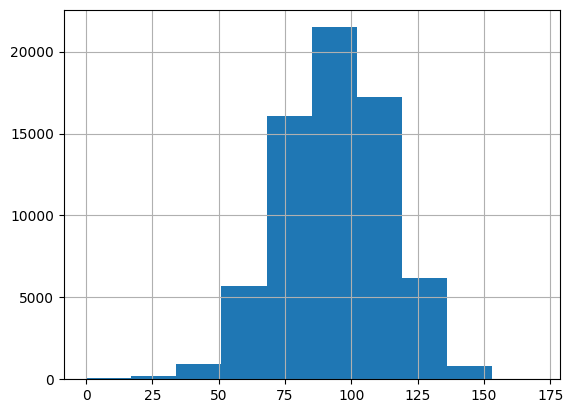

In [219]:
df.PUNT_GLOBAL.hist()

In [220]:
fig = px.box(df, x="ESTU_AREARESIDE", y="PUNT_GLOBAL")
fig.show()